In [1]:
import pandas as pd 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier


In [44]:
data_train = pd.read_csv("E://Lomba//random_project//Backpack Prediction//playground-series-s5e2//train.csv")
data_train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [45]:
data_test = pd.read_csv("E://Lomba//random_project//Backpack Prediction//playground-series-s5e2//test.csv")
data_test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [46]:
sample_submission = pd.read_csv("E://Lomba//random_project//Backpack Prediction//playground-series-s5e2//sample_submission.csv")
sample_submission

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411
...,...,...
199995,499995,81.411
199996,499996,81.411
199997,499997,81.411
199998,499998,81.411


In [47]:
data_train_use = data_train.copy()
data_test_use = data_test.copy()

# imputasi

## Brand

In [48]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Brand
le = LabelEncoder()
data_train_use['Brand_enc'] = le.fit_transform(data_train_use['Brand'].astype(str))
data_train_use.loc[data_train_use['Brand'].isnull(), 'Brand_enc'] = np.nan
print("Missing awal Brand (train):", data_train_use['Brand_enc'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Brand_enc'] = le.fit_transform(data_test_use['Brand'].astype(str))
data_test_use.loc[data_test_use['Brand'].isnull(), 'Brand_enc'] = np.nan
print("Missing awal Brand (test):", data_test_use['Brand_enc'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Brand_enc'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Brand_enc'].isnull()]

train_data_test = clean_data_test[clean_data_test['Brand_enc'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Brand_enc'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Brand_enc'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Brand_enc'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Brand_enc'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Brand_enc'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Brand_enc'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Brand_enc'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Brand_enc'].mode()[0])
data_train_use['Brand_enc'] = data_train_use['Brand_enc'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Brand_enc'].mode()[0])
data_test_use['Brand_enc'] = data_test_use['Brand_enc'].fillna(mode_enc_test)

# Convert
data_train_use['Brand_imputed'] = data_train_use['Brand_enc'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Brand_enc'].isnull().sum())

data_test_use['Brand_imputed'] = data_test_use['Brand_enc'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Brand_enc'].isnull().sum())


Missing awal Brand (train): 9705
Missing awal Brand (test): 6227
Missing setelah prediksi model (train): 30
Missing setelah prediksi model (test): 21
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [49]:
data_train_use.drop(columns=['Brand'],axis=1,inplace=True)
data_train_use.drop(columns=['Brand_enc'],axis=1,inplace=True)

data_test_use.drop(columns=['Brand'],axis=1,inplace=True)
data_test_use.drop(columns=['Brand_enc'],axis=1,inplace=True)

## Material

In [50]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Material
le = LabelEncoder()
data_train_use['Material_enc'] = le.fit_transform(data_train_use['Material'].astype(str))
data_train_use.loc[data_train_use['Material'].isnull(), 'Material_enc'] = np.nan
print("Missing awal Material (train):", data_train_use['Material_enc'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Material_enc'] = le.fit_transform(data_test_use['Material'].astype(str))
data_test_use.loc[data_test_use['Material'].isnull(), 'Material_enc'] = np.nan
print("Missing awal Material (test):", data_test_use['Material_enc'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Material_enc'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Material_enc'].isnull()]

train_data_test = clean_data_test[clean_data_test['Material_enc'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Material_enc'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Material_enc'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Material_enc'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Material_enc'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Material_enc'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Material_enc'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Material_enc'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Material_enc'].mode()[0])
data_train_use['Material_enc'] = data_train_use['Material_enc'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Material_enc'].mode()[0])
data_test_use['Material_enc'] = data_test_use['Material_enc'].fillna(mode_enc_test)

# Convert
data_train_use['Material_imputed'] = data_train_use['Material_enc'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Material_enc'].isnull().sum())

data_test_use['Material_imputed'] = data_test_use['Material_enc'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Material_enc'].isnull().sum())


Missing awal Material (train): 8347
Missing awal Material (test): 5613
Missing setelah prediksi model (train): 43
Missing setelah prediksi model (test): 18
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [51]:
data_train_use.drop(columns=['Material'],axis=1,inplace=True)
data_train_use.drop(columns=['Material_enc'],axis=1,inplace=True)

data_test_use.drop(columns=['Material'],axis=1,inplace=True)
data_test_use.drop(columns=['Material_enc'],axis=1,inplace=True)

## Size

In [52]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Size
le = LabelEncoder()
data_train_use['Size_enc'] = le.fit_transform(data_train_use['Size'].astype(str))
data_train_use.loc[data_train_use['Size'].isnull(), 'Size_enc'] = np.nan
print("Missing awal Size (train):", data_train_use['Size_enc'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Size_enc'] = le.fit_transform(data_test_use['Size'].astype(str))
data_test_use.loc[data_test_use['Size'].isnull(), 'Size_enc'] = np.nan
print("Missing awal Size (test):", data_test_use['Size_enc'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Size_enc'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Size_enc'].isnull()]

train_data_test = clean_data_test[clean_data_test['Size_enc'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Size_enc'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Size_enc'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Size_enc'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Size_enc'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Size_enc'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Size_enc'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Size_enc'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Size_enc'].mode()[0])
data_train_use['Size_enc'] = data_train_use['Size_enc'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Size_enc'].mode()[0])
data_test_use['Size_enc'] = data_test_use['Size_enc'].fillna(mode_enc_test)

# Convert
data_train_use['Size_imputed'] = data_train_use['Size_enc'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Size_enc'].isnull().sum())

data_test_use['Size_imputed'] = data_test_use['Size_enc'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Size_enc'].isnull().sum())


Missing awal Size (train): 6595
Missing awal Size (test): 4381
Missing setelah prediksi model (train): 30
Missing setelah prediksi model (test): 21
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [53]:
data_train_use.drop(columns=['Size'],axis=1,inplace=True)
data_train_use.drop(columns=['Size_enc'],axis=1,inplace=True)

data_test_use.drop(columns=['Size'],axis=1,inplace=True)
data_test_use.drop(columns=['Size_enc'],axis=1,inplace=True)

## Laptop Compartment


In [54]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Laptop Compartment
le = LabelEncoder()
data_train_use['Laptop_Compartment_ec'] = le.fit_transform(data_train_use['Laptop Compartment'].astype(str))
data_train_use.loc[data_train_use['Laptop Compartment'].isnull(), 'Laptop_Compartment_ec'] = np.nan
print("Missing awal Laptop Compartment (train):", data_train_use['Laptop_Compartment_ec'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Laptop_Compartment_ec'] = le.fit_transform(data_test_use['Laptop Compartment'].astype(str))
data_test_use.loc[data_test_use['Laptop Compartment'].isnull(), 'Laptop_Compartment_ec'] = np.nan
print("Missing awal Laptop Compartment (test):", data_test_use['Laptop_Compartment_ec'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Laptop_Compartment_ec'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Laptop_Compartment_ec'].isnull()]

train_data_test = clean_data_test[clean_data_test['Laptop_Compartment_ec'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Laptop_Compartment_ec'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Laptop_Compartment_ec'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Laptop_Compartment_ec'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Laptop_Compartment_ec'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Laptop_Compartment_ec'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Laptop_Compartment_ec'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Laptop_Compartment_ec'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Laptop_Compartment_ec'].mode()[0])
data_train_use['Laptop_Compartment_ec'] = data_train_use['Laptop_Compartment_ec'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Laptop_Compartment_ec'].mode()[0])
data_test_use['Laptop_Compartment_ec'] = data_test_use['Laptop_Compartment_ec'].fillna(mode_enc_test)

# Convert
data_train_use['Laptop_Compartment_imputed'] = data_train_use['Laptop_Compartment_ec'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Laptop_Compartment_ec'].isnull().sum())

data_test_use['Laptop_Compartment_imputed'] = data_test_use['Laptop_Compartment_ec'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Laptop_Compartment_ec'].isnull().sum())


Missing awal Laptop Compartment (train): 7444
Missing awal Laptop Compartment (test): 4962
Missing setelah prediksi model (train): 39
Missing setelah prediksi model (test): 21
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [55]:
data_train_use.drop(columns=['Laptop Compartment'],axis=1,inplace=True)
data_train_use.drop(columns=['Laptop_Compartment_ec'],axis=1,inplace=True)

data_test_use.drop(columns=['Laptop Compartment'],axis=1,inplace=True)
data_test_use.drop(columns=['Laptop_Compartment_ec'],axis=1,inplace=True)

## Waterproof

In [56]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Waterproof
le = LabelEncoder()
data_train_use['Waterproof_ec'] = le.fit_transform(data_train_use['Waterproof'].astype(str))
data_train_use.loc[data_train_use['Waterproof'].isnull(), 'Waterproof_ec'] = np.nan
print("Missing awal Waterproof (train):", data_train_use['Waterproof_ec'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Waterproof_ec'] = le.fit_transform(data_test_use['Waterproof'].astype(str))
data_test_use.loc[data_test_use['Waterproof'].isnull(), 'Waterproof_ec'] = np.nan
print("Missing awal Waterproof (test):", data_test_use['Waterproof_ec'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Waterproof_ec'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Waterproof_ec'].isnull()]

train_data_test = clean_data_test[clean_data_test['Waterproof_ec'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Waterproof_ec'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Waterproof_ec'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Waterproof_ec'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Waterproof_ec'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Waterproof_ec'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Waterproof_ec'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Waterproof_ec'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Waterproof_ec'].mode()[0])
data_train_use['Waterproof_ec'] = data_train_use['Waterproof_ec'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Waterproof_ec'].mode()[0])
data_test_use['Waterproof_ec'] = data_test_use['Waterproof_ec'].fillna(mode_enc_test)

# Convert
data_train_use['Waterproof_imputed'] = data_train_use['Waterproof_ec'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Waterproof_ec'].isnull().sum())

data_test_use['Waterproof_imputed'] = data_test_use['Waterproof_ec'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Waterproof_ec'].isnull().sum())


Missing awal Waterproof (train): 7050
Missing awal Waterproof (test): 4811
Missing setelah prediksi model (train): 57
Missing setelah prediksi model (test): 40
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [57]:
data_train_use.drop(columns=['Waterproof'],axis=1,inplace=True)
data_train_use.drop(columns=['Waterproof_ec'],axis=1,inplace=True)

data_test_use.drop(columns=['Waterproof'],axis=1,inplace=True)
data_test_use.drop(columns=['Waterproof_ec'],axis=1,inplace=True)

## Style

In [58]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Style
le = LabelEncoder()
data_train_use['Style_ec'] = le.fit_transform(data_train_use['Style'].astype(str))
data_train_use.loc[data_train_use['Style'].isnull(), 'Style_ec'] = np.nan
print("Missing awal Style (train):", data_train_use['Style_ec'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Style_ec'] = le.fit_transform(data_test_use['Style'].astype(str))
data_test_use.loc[data_test_use['Style'].isnull(), 'Style_ec'] = np.nan
print("Missing awal Style (test):", data_test_use['Style_ec'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Style_ec'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Style_ec'].isnull()]

train_data_test = clean_data_test[clean_data_test['Style_ec'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Style_ec'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Style_ec'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Style_ec'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Style_ec'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Style_ec'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Style_ec'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Style_ec'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Style_ec'].mode()[0])
data_train_use['Style_ec'] = data_train_use['Style_ec'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Style_ec'].mode()[0])
data_test_use['Style_ec'] = data_test_use['Style_ec'].fillna(mode_enc_test)

# Convert
data_train_use['Style_imputed'] = data_train_use['Style_ec'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Style_ec'].isnull().sum())

data_test_use['Style_imputed'] = data_test_use['Style_ec'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Style_ec'].isnull().sum())


Missing awal Style (train): 7970
Missing awal Style (test): 5153
Missing setelah prediksi model (train): 25
Missing setelah prediksi model (test): 7
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [59]:
data_train_use.drop(columns=['Style'],axis=1,inplace=True)
data_train_use.drop(columns=['Style_ec'],axis=1,inplace=True)

data_test_use.drop(columns=['Style'],axis=1,inplace=True)
data_test_use.drop(columns=['Style_ec'],axis=1,inplace=True)

## Color

In [60]:
# Fitur prediktor
features = ['Compartments', 'Weight Capacity (kg)']

# Encode Color
le = LabelEncoder()
data_train_use['Color_ec'] = le.fit_transform(data_train_use['Color'].astype(str))
data_train_use.loc[data_train_use['Color'].isnull(), 'Color_ec'] = np.nan
print("Missing awal Color (train):", data_train_use['Color_ec'].isnull().sum())

le_test = LabelEncoder()
data_test_use['Color_ec'] = le.fit_transform(data_test_use['Color'].astype(str))
data_test_use.loc[data_test_use['Color'].isnull(), 'Color_ec'] = np.nan
print("Missing awal Color (test):", data_test_use['Color_ec'].isnull().sum())

# Drop baris dengan missing di prediktor
clean_data_train = data_train_use.dropna(subset=features)
clean_data_test = data_test_use.dropna(subset=features)

# Train data
train_data_train = clean_data_train[clean_data_train['Color_ec'].notnull()]
predict_data_train = clean_data_train[clean_data_train['Color_ec'].isnull()]

train_data_test = clean_data_test[clean_data_test['Color_ec'].notnull()]
predict_data_test = clean_data_test[clean_data_test['Color_ec'].isnull()]

# Train model
rf_train = RandomForestClassifier(n_estimators=100, random_state=0)
rf_train.fit(train_data_train[features], train_data_train['Color_ec'])

rf_test = RandomForestClassifier(n_estimators=100, random_state=0)
rf_test.fit(train_data_test[features], train_data_test['Color_ec'])

# Predict
preds_train = rf_train.predict(predict_data_train[features])
preds_test = rf_test.predict(predict_data_test[features])

# Isi hasil prediksi
data_train_use.loc[predict_data_train.index, 'Color_ec'] = preds_train
print("Missing setelah prediksi model (train):", data_train_use['Color_ec'].isnull().sum())

data_test_use.loc[predict_data_test.index, 'Color_ec'] = preds_test
print("Missing setelah prediksi model (test):", data_test_use['Color_ec'].isnull().sum())

# Ganti sisa NaN dengan modus
mode_enc_train = int(data_train_use['Color_ec'].mode()[0])
data_train_use['Color_ec'] = data_train_use['Color_ec'].fillna(mode_enc_train)

mode_enc_test = int(data_test_use['Color_ec'].mode()[0])
data_test_use['Color_ec'] = data_test_use['Color_ec'].fillna(mode_enc_test)

# Convert
data_train_use['Color_imputed'] = data_train_use['Color_ec'].astype(int)
print("Missing setelah diisi modus (train):", data_train_use['Color_ec'].isnull().sum())

data_test_use['Color_imputed'] = data_test_use['Color_ec'].astype(int)
print("Missing setelah diisi modus (test):", data_test_use['Color_ec'].isnull().sum())


Missing awal Color (train): 9950
Missing awal Color (test): 6785
Missing setelah prediksi model (train): 14
Missing setelah prediksi model (test): 8
Missing setelah diisi modus (train): 0
Missing setelah diisi modus (test): 0


In [61]:
data_train_use.drop(columns=['Color'],axis=1,inplace=True)
data_train_use.drop(columns=['Color_ec'],axis=1,inplace=True)

data_test_use.drop(columns=['Color'],axis=1,inplace=True)
data_test_use.drop(columns=['Color_ec'],axis=1,inplace=True)

## Weight Capacity (kg)

In [62]:
weight_train = data_train_use['Weight Capacity (kg)'].median()
data_train_use['Weight Capacity (kg)'].fillna(weight_train,inplace=True)

weight_test = data_test_use['Weight Capacity (kg)'].median()
data_test_use['Weight Capacity (kg)'].fillna(weight_test,inplace=True)

In [63]:
data_train_use

,id,Compartments,Weight Capacity (kg),Price,Brand_imputed,Material_imputed,Size_imputed,Laptop_Compartment_imputed,Waterproof_imputed,Style_imputed,Color_imputed
0,0,7.0,11.611723,112.15875,1,1,1,1,0,2,0
1,1,10.0,27.078537,68.88056,1,0,2,1,1,1,3
2,2,2.0,16.643760,39.17320,4,1,2,1,0,1,5
3,3,8.0,12.937220,80.60793,2,2,2,1,0,1,3
4,4,1.0,17.749338,86.02312,0,0,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,9.0,12.730812,129.99749,0,1,2,0,0,2,1
299996,299996,6.0,26.633182,19.85819,1,1,0,0,1,2,1
299997,299997,9.0,11.898250,111.41364,3,0,0,1,1,0,4
299998,299998,1.0,6.175738,115.89080,0,2,2,0,1,2,4


In [64]:
data_test_use

,id,Compartments,Weight Capacity (kg),Brand_imputed,Material_imputed,Size_imputed,Laptop_Compartment_imputed,Waterproof_imputed,Style_imputed,Color_imputed
0,300000,2.0,20.671147,3,1,2,0,0,2,3
1,300001,7.0,13.564105,2,0,1,0,1,0,3
2,300002,9.0,11.809799,0,0,0,0,1,1,1
3,300003,1.0,18.477036,0,2,0,1,0,1,3
4,300004,2.0,9.907953,4,2,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
199995,499995,2.0,7.383498,0,0,0,1,0,1,5
199996,499996,9.0,6.058394,2,3,2,0,1,1,4
199997,499997,9.0,26.890163,1,2,2,0,1,2,3
199998,499998,10.0,25.769153,3,2,0,1,0,2,2


## Save

In [65]:
data_train_use.to_csv('data_train_prepo.csv',index=False)
data_test_use.to_csv('data_test_prepo.csv',index=False)

# Modeling

In [2]:
data_train_fix = pd.read_csv("E://Lomba//random_project//Backpack Prediction//data_train_prepo.csv")
data_test_fix = pd.read_csv("E://Lomba//random_project//Backpack Prediction//data_test_prepo.csv")

In [6]:
data_train_fix.drop(columns=['id'],inplace=True)
data_train_fix

,Compartments,Weight Capacity (kg),Price,Brand_imputed,Material_imputed,Size_imputed,Laptop_Compartment_imputed,Waterproof_imputed,Style_imputed,Color_imputed
0,7.0,11.611723,112.15875,1,1,1,1,0,2,0
1,10.0,27.078537,68.88056,1,0,2,1,1,1,3
2,2.0,16.643760,39.17320,4,1,2,1,0,1,5
3,8.0,12.937220,80.60793,2,2,2,1,0,1,3
4,1.0,17.749338,86.02312,0,0,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...
299995,9.0,12.730812,129.99749,0,1,2,0,0,2,1
299996,6.0,26.633182,19.85819,1,1,0,0,1,2,1
299997,9.0,11.898250,111.41364,3,0,0,1,1,0,4
299998,1.0,6.175738,115.89080,0,2,2,0,1,2,4


In [7]:
data_test_fix.drop(columns=['id'],inplace=True)
data_test_fix

,Compartments,Weight Capacity (kg),Brand_imputed,Material_imputed,Size_imputed,Laptop_Compartment_imputed,Waterproof_imputed,Style_imputed,Color_imputed
0,2.0,20.671147,3,1,2,0,0,2,3
1,7.0,13.564105,2,0,1,0,1,0,3
2,9.0,11.809799,0,0,0,0,1,1,1
3,1.0,18.477036,0,2,0,1,0,1,3
4,2.0,9.907953,4,2,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...
199995,2.0,7.383498,0,0,0,1,0,1,5
199996,9.0,6.058394,2,3,2,0,1,1,4
199997,9.0,26.890163,1,2,2,0,1,2,3
199998,10.0,25.769153,3,2,0,1,0,2,2


In [14]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import cv2
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier
import math
import optuna

In [10]:
x = data_train_fix.drop(columns='Price')
y = data_train_fix['Price']

In [15]:
# numerik
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        # 'scale_pos_weight' dihapus
    }

    model = XGBRegressor(**params, random_state=0, verbosity=0)
    scores = cross_val_score(model, x, y, cv=5, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

In [16]:
study = optuna.create_study(direction='maximize')  # Karena kita pakai neg_root_mean_squared_error
study.optimize(objective, n_trials=50)

print("Best trial:")
print(study.best_trial)

[I 2025-06-29 10:23:23,699] A new study created in memory with name: no-name-41d68931-b3fe-4730-9afe-bff2bc439203
[I 2025-06-29 10:24:56,322] Trial 0 finished with value: -39.03833932335225 and parameters: {'max_depth': 6, 'learning_rate': 0.08268249280948407, 'n_estimators': 210, 'subsample': 0.7620307607017858, 'colsample_bytree': 0.796561373285237, 'gamma': 1.0843147860303888, 'min_child_weight': 9, 'reg_lambda': 3.4892712284148324, 'reg_alpha': 1.9171076238496636}. Best is trial 0 with value: -39.03833932335225.
[I 2025-06-29 10:27:50,297] Trial 1 finished with value: -39.20240890614566 and parameters: {'max_depth': 6, 'learning_rate': 0.15534956694286656, 'n_estimators': 419, 'subsample': 0.7384042940629534, 'colsample_bytree': 0.8414339462669381, 'gamma': 3.2788409817503212, 'min_child_weight': 8, 'reg_lambda': 1.9492266832716143, 'reg_alpha': 0.1424408171135655}. Best is trial 0 with value: -39.03833932335225.
[I 2025-06-29 10:30:46,720] Trial 2 finished with value: -39.96216859

Best trial:
FrozenTrial(number=36, state=TrialState.COMPLETE, values=[-39.01039728708166], datetime_start=datetime.datetime(2025, 6, 29, 12, 30, 40, 192245), datetime_complete=datetime.datetime(2025, 6, 29, 12, 32, 22, 151941), params={'max_depth': 3, 'learning_rate': 0.03149200731342477, 'n_estimators': 557, 'subsample': 0.6698217919719863, 'colsample_bytree': 0.8479896786267492, 'gamma': 3.4862224178429435, 'min_child_weight': 7, 'reg_lambda': 4.878000915318244, 'reg_alpha': 3.573417333699541}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=5.0, log=False, low=0.0, st

In [17]:
best_model =XGBRegressor(
    **study.best_params,
    random_state=42,
    verbosity=0
)
best_model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8479896786267492, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=3.4862224178429435, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03149200731342477, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=557, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [19]:
y_pred = best_model.predict(data_test_fix)

In [20]:
scores = cross_val_score(best_model,x,y,cv=5,scoring='neg_root_mean_squared_error')
mean_rmse = -scores.mean()
print('Mean CV RMSE:', mean_rmse)

Mean CV RMSE: 39.012420142001744


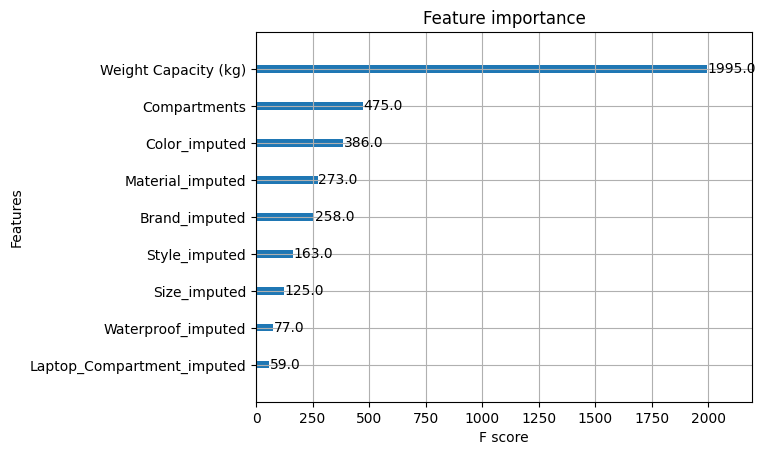

In [21]:
import xgboost as xgb
xgb.plot_importance(best_model,max_num_features=10)
plt.show()

In [22]:
importances = best_model.feature_importances_
feature_names = x.columns
feat_imp_df = pd.DataFrame({'Feature' : feature_names, 'Importance' : importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance',ascending=False)
print(feat_imp_df)

                      Feature  Importance
1        Weight Capacity (kg)    0.168674
3            Material_imputed    0.133733
2               Brand_imputed    0.110325
8               Color_imputed    0.108616
0                Compartments    0.102718
6          Waterproof_imputed    0.096621
5  Laptop_Compartment_imputed    0.095899
7               Style_imputed    0.094853
4                Size_imputed    0.088562


In [23]:
sample_submission = pd.read_csv("E://Lomba//random_project//Backpack Prediction//playground-series-s5e2//sample_submission.csv")
sample_submission

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411
...,...,...
199995,499995,81.411
199996,499996,81.411
199997,499997,81.411
199998,499998,81.411


In [25]:
data_test_fix_2 = pd.read_csv("E://Lomba//random_project//Backpack Prediction//data_test_prepo.csv")
data_test_fix_2

,id,Compartments,Weight Capacity (kg),Brand_imputed,Material_imputed,Size_imputed,Laptop_Compartment_imputed,Waterproof_imputed,Style_imputed,Color_imputed
0,300000,2.0,20.671147,3,1,2,0,0,2,3
1,300001,7.0,13.564105,2,0,1,0,1,0,3
2,300002,9.0,11.809799,0,0,0,0,1,1,1
3,300003,1.0,18.477036,0,2,0,1,0,1,3
4,300004,2.0,9.907953,4,2,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
199995,499995,2.0,7.383498,0,0,0,1,0,1,5
199996,499996,9.0,6.058394,2,3,2,0,1,1,4
199997,499997,9.0,26.890163,1,2,2,0,1,2,3
199998,499998,10.0,25.769153,3,2,0,1,0,2,2


In [26]:
submission = pd.DataFrame({
    'id' : data_test_fix_2['id'],
    'Price' : y_pred
})
submission.to_csv('submission_1.csv',index=False)